# Graph Coloring Problem

In this tutorial, the classical graph coloring problem will be solved by the DSatur heuristic and by a MIP model.

The goal is to find the minimum number of distinct color to use coloring nodes in an undirected graph, so that two neighbor nodes do not share the same color.

In [1]:
import pyomo.environ as pyo

from gcol import DSatur, Graph, draw_from_nodes, load_instance, ilp_from_graph

In [2]:
data = load_instance("instances/input_32.txt")

## DSatur

In [14]:
graph = Graph(data['edges'])
dsatur = DSatur()
dsatur.solve(graph, save_history=True)
print(f'{dsatur.cost} colors used')

0.0050013065338134766
9 colors used


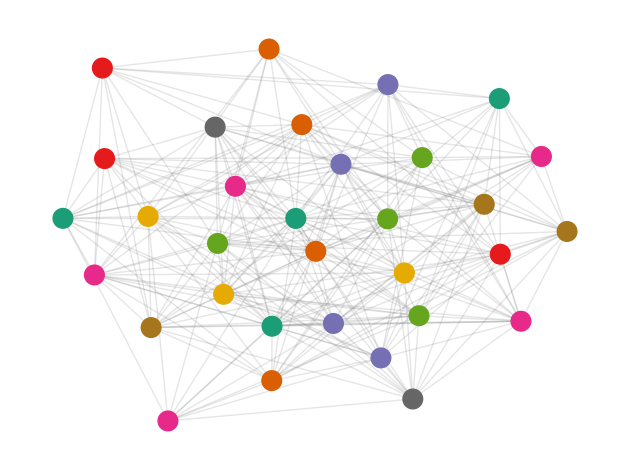

In [4]:
draw_from_nodes(
    graph.nodes, seed=12, use_labels=False, plot_margins=False, layout_iter=1000
)

In [5]:
from gcol.plot import draw_colored_gif

draw_colored_gif(
    "alt_coloring_history_loop_32.gif",
    graph.nodes,
    dsatur.history,
    seed=12,
    use_labels=False,
    plot_margins=False,
    layout_iter=1000,
    duration=250,
)

## MIP

$$
\begin{align}
    \text{min} \quad & \sum_{c \in C} y_{c} \\
    \text{s.t} \quad & \sum_{c \in C} x_{i, c} = 1 & \forall \; i \in N \\
    & x_{i, c} + x_{j, c} \leq y_{c} & \forall \; i, j \in E, c \in C \\
    & y_{C_{k-1}} \leq y_{C_{k}} & \forall \; k \in (2, ..., |C|) \\
    & x_{i, c} \in \{0, 1\} & \forall \; i \in N, c \in C \\
    & y_{c} \in \{0, 1\} & \forall \; c \in C
\end{align}
$$

In [6]:
solver = pyo.SolverFactory('appsi_highs')
ilp = ilp_from_graph(graph)
solver.solve(ilp, tee=True)

Running HiGHS 1.9.0 (git hash: fa40bdf): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [1e+00, 1e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+00]
Presolving model
4684 rows, 297 cols, 14236 nonzeros  0s
2362 rows, 297 cols, 7270 nonzeros  0s
2360 rows, 295 cols, 6750 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   2360 rows
   295 cols (295 binary, 0 integer, 0 implied int., 0 continuous)
   6750 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   I

{'Problem': [{'Lower bound': 8.0, 'Upper bound': 8.0, 'Number of objectives': 1, 'Number of constraints': 0, 'Number of variables': 0, 'Sense': 1}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Termination message': 'TerminationCondition.optimal'}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [7]:
new_graph = Graph(data['edges'])

for c in ilp.C:
    color = new_graph.add_color()
    for n in ilp.N:
        if round(ilp.x[n, c].value, ndigits=0) == 1:
            new_graph.nodes[n].set_color(color)

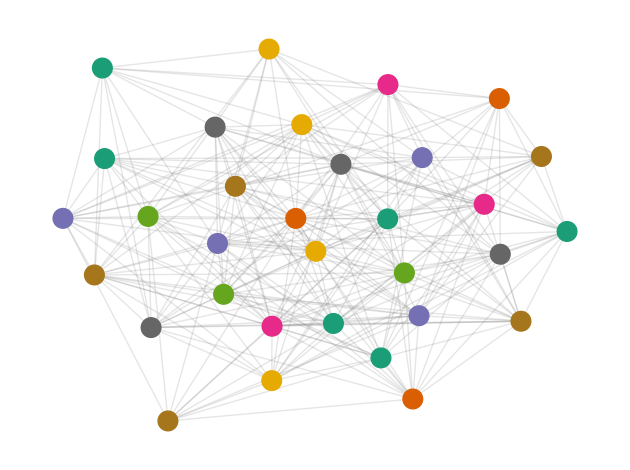

In [8]:
draw_from_nodes(
    new_graph.nodes, seed=12, use_labels=False, plot_margins=False, layout_iter=1000
)